# Density

## Create mega dataframe with all the clean density values and save as csv

In [4]:
#05/11/2025
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

#plotting parameters
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 20*1.3})
plt.rcParams['figure.facecolor'] = "white"

def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

# mega_df
pressure =[]
temperature = []
density =[]

pressure_error =[]
temperature_error = []
density_error = []

paper =[]

#create mega dataframe
for key in all_papers.keys():
    path = all_papers[key][2]
    data = pd.read_excel(path)

    pressure += list(data["P_SI"])
    temperature += list(data["T_SI"])
    density += list(data["rho_SI"])

    pressure_error += list(data["delta_P"])
    temperature_error += list(data["delta_T"])
    density_error += list(data["delta_rho"])

    paper += [key]*(data.index[-1]+1)

df = pd.DataFrame(data = {"paper": paper,
                          "P": pressure,
                          "T": temperature,
                          "rho": density,
                          "delta_P": pressure_error,
                          "delta_T": temperature_error,
                          "delta_rho": density_error}
)


# save dataframe
df.to_csv("dataframes/experimental_data_density/ammonia_density.csv")



## Scatter plot of data per paper

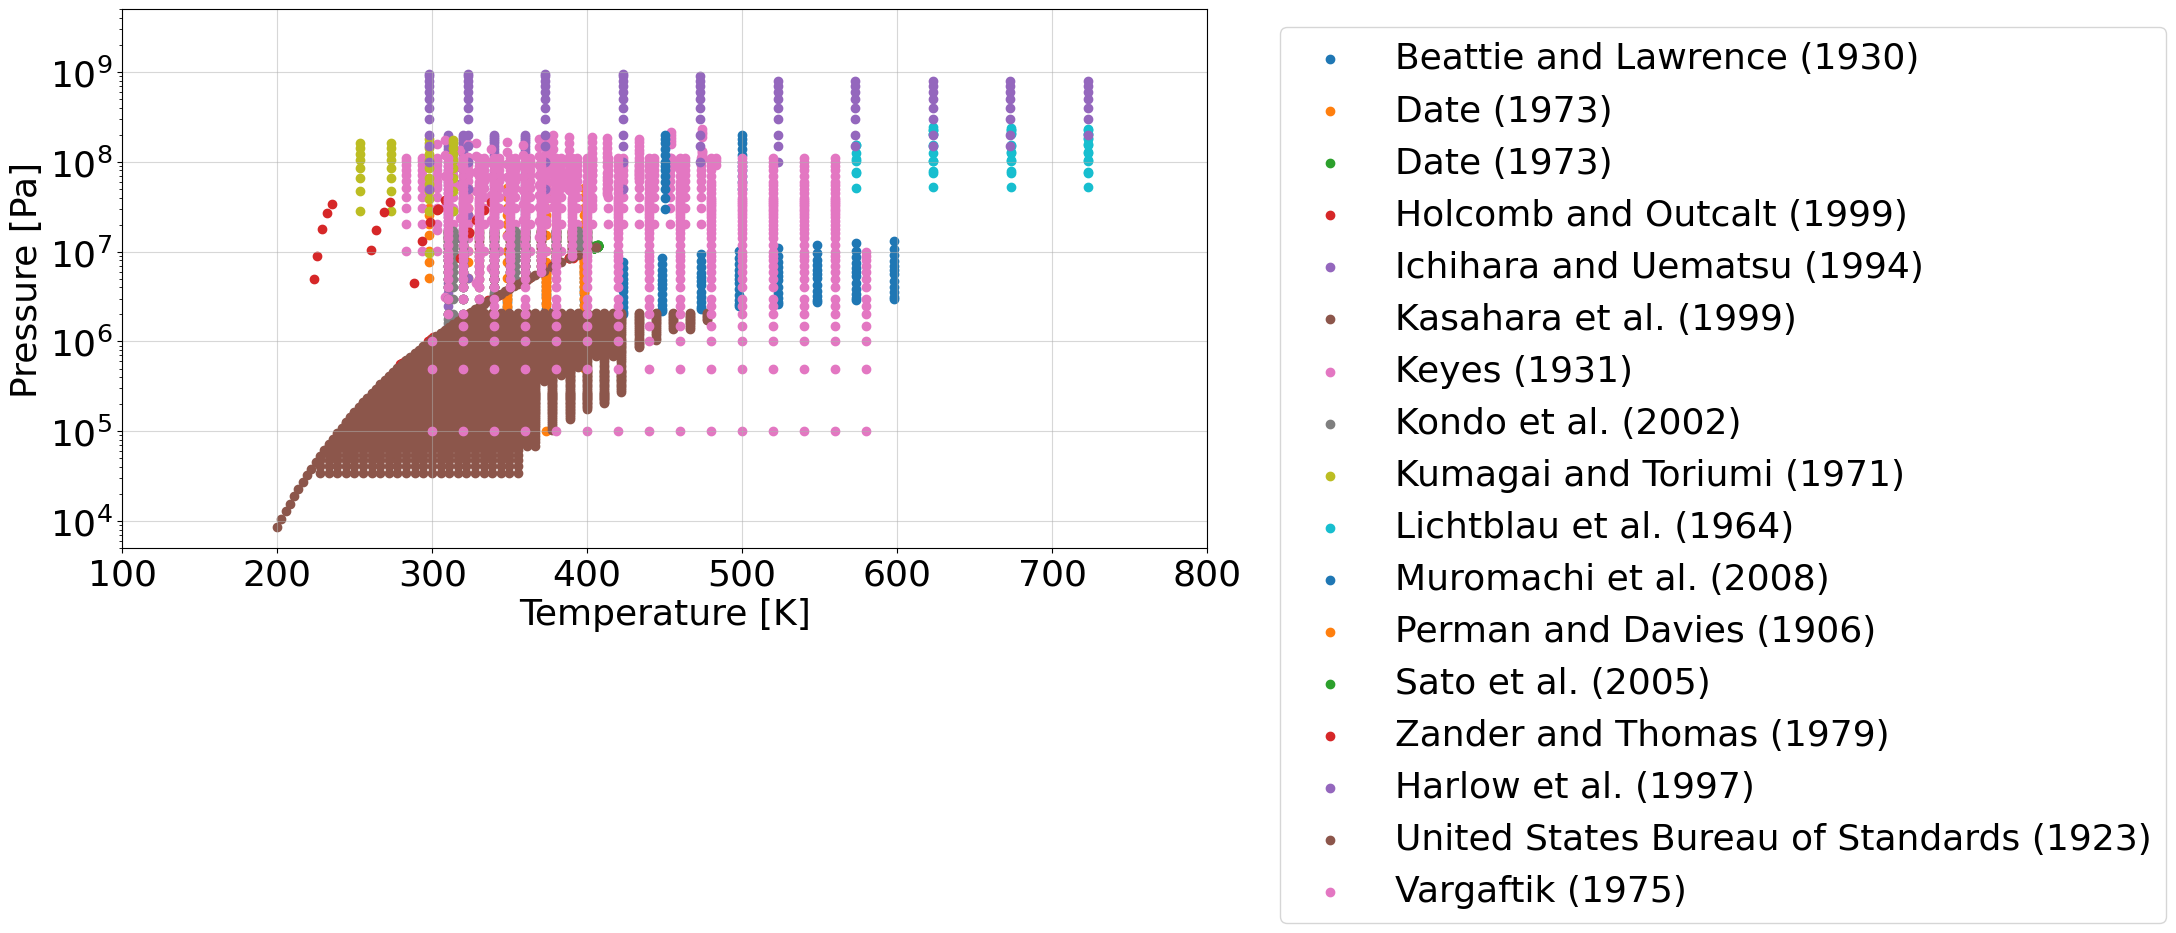

In [61]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

def paper_path(paper_number):
    return f"dataframes/experimental_data_density/0{str(paper_number)}.xlsx"

#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    362: ["Kasahara et al.", 1999, paper_path(362)],
    363: ["Keyes", 1931, paper_path(363)],
    364: ["Kondo et al.", 2002, paper_path(364)],
    365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    367: ["Lichtblau et al.", 1964, paper_path(367)],
    368: ["Muromachi et al.", 2008, paper_path(368)],
    369: ["Perman and Davies", 1906, paper_path(369)],
    370: ["Sato et al.", 2005, paper_path(370)],
    372: ["Zander and Thomas", 1979, paper_path(372)],
    373: ["Harlow et al.", 1997, paper_path(373)],
    374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

df = pd.read_csv("dataframes/experimental_data_density/ammonia_density.csv")

fig, ax = plt.subplots()

for paper in df["paper"].unique():
    data = df[df["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    


## Seperate data into supercritical, superheated and subcooled regions

C:\Users\cd318\AppData\Local\Temp\ipykernel_4208\4150932562.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_supercritical = df[df["T"]>NH3.T_c][df["P"]>NH3.P_c]


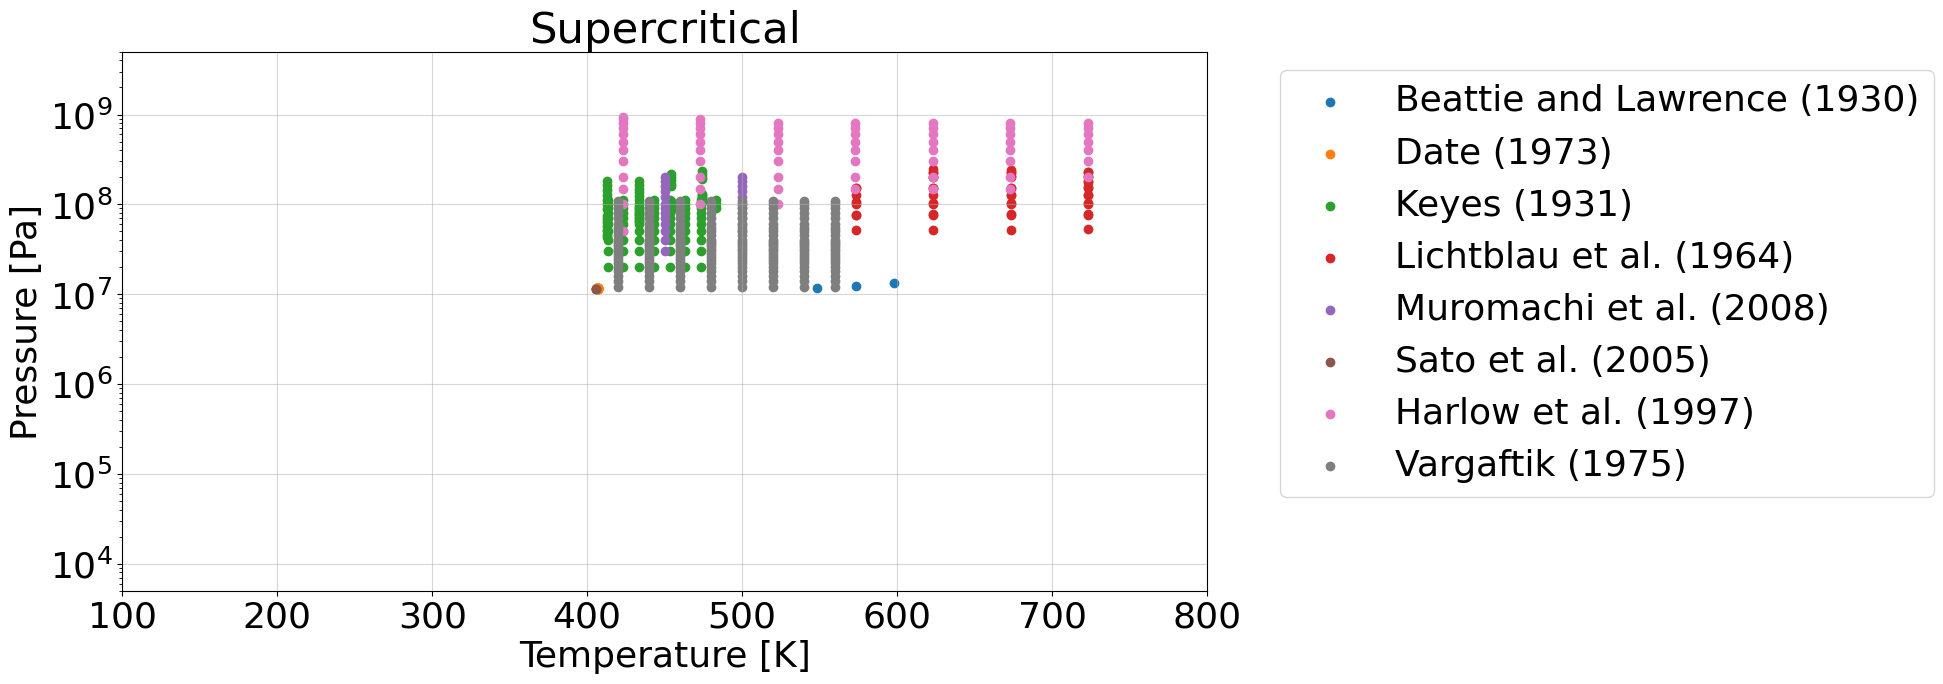

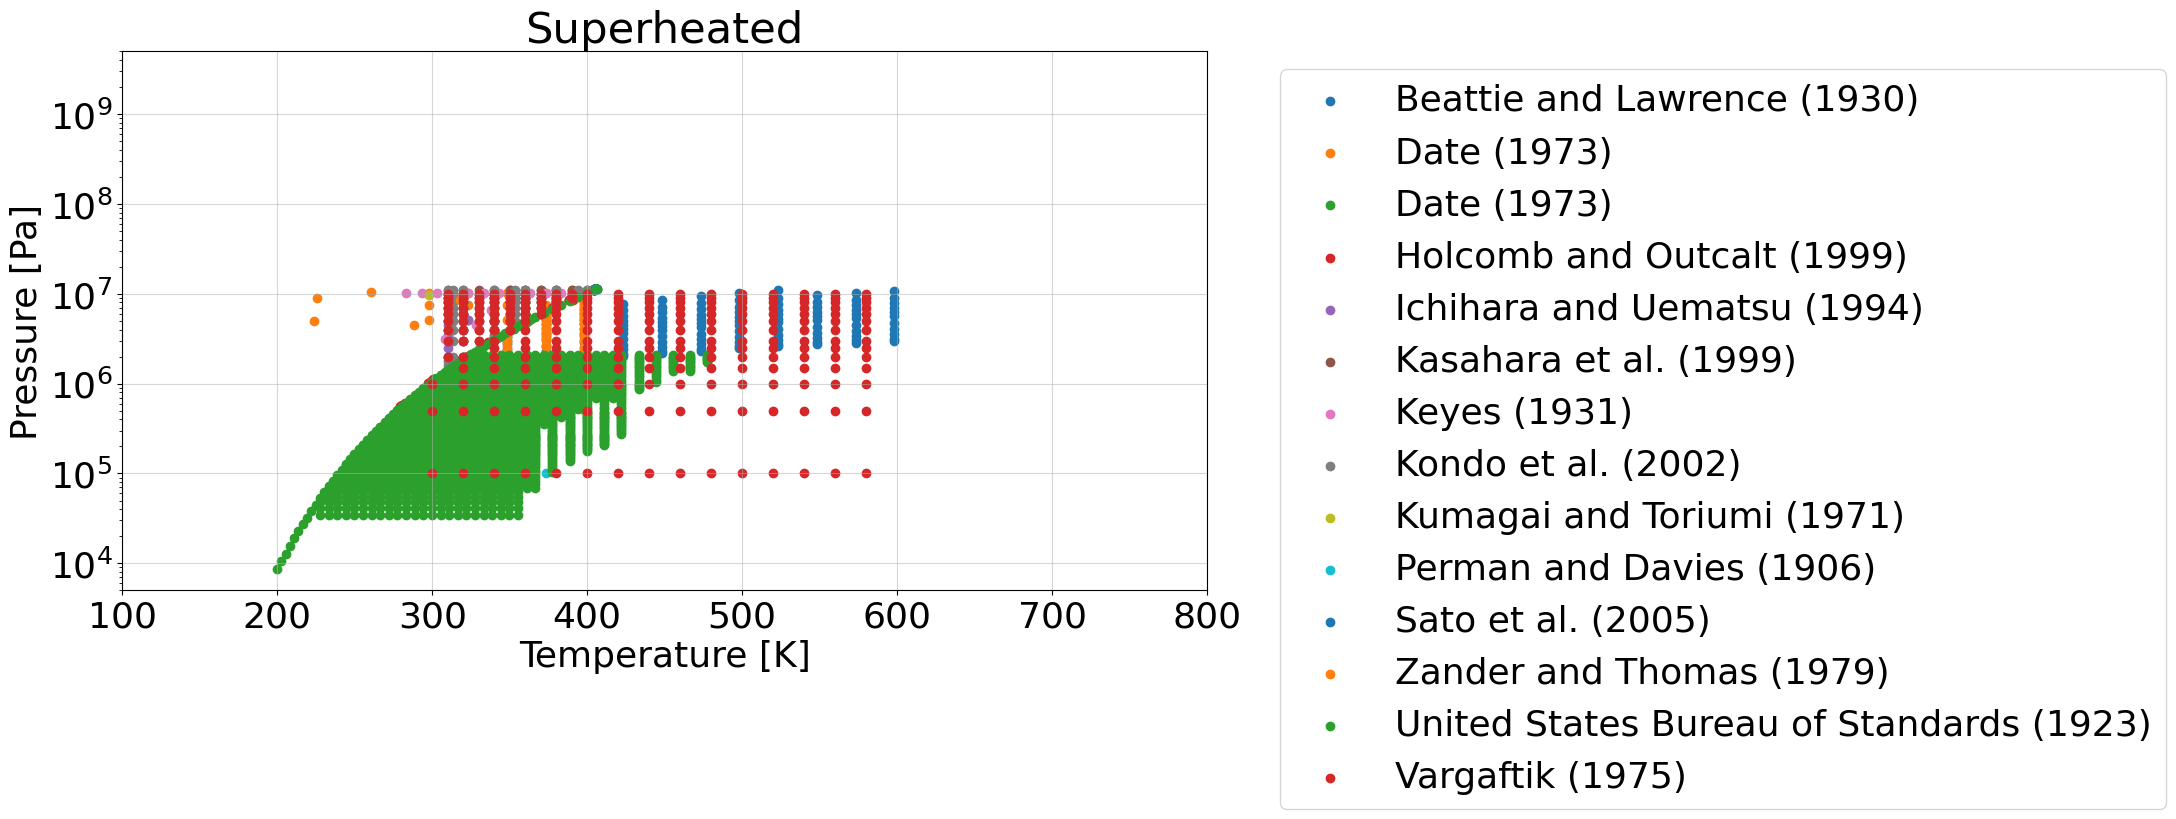

In [59]:
# 05/11/2025
import pandas as pd
from purefluid import NH3

#
df = pd.read_csv("dataframes/experimental_data_density/ammonia_density.csv")

# ================================================ supercritical
df_supercritical = df[df["T"]>NH3.T_c][df["P"]>NH3.P_c]

fig, ax = plt.subplots()

for paper in df_supercritical["paper"].unique():
    data = df_supercritical[df_supercritical["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", 
       ylabel="Pressure [Pa]", xlabel="Temperature [K]", title="Supercritical",
       xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1)) 


# ================================================ superheated
df_superheated = df[df["P"]<NH3.P_c]

# saturation line


fig, ax = plt.subplots()

for paper in df_superheated["paper"].unique():
    data = df_superheated[df_superheated["paper"]==paper]
    ax.scatter(data["T"], data["P"], label = all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", 
       ylabel="Pressure [Pa]", xlabel="Temperature [K]", title="Superheated",
       xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1)) 


# Saturation

## Visualising experimental data from specific papers

points = 22
pressure range = [0.09, 113.00] bar
temperature range = [200.00, 405.60] K


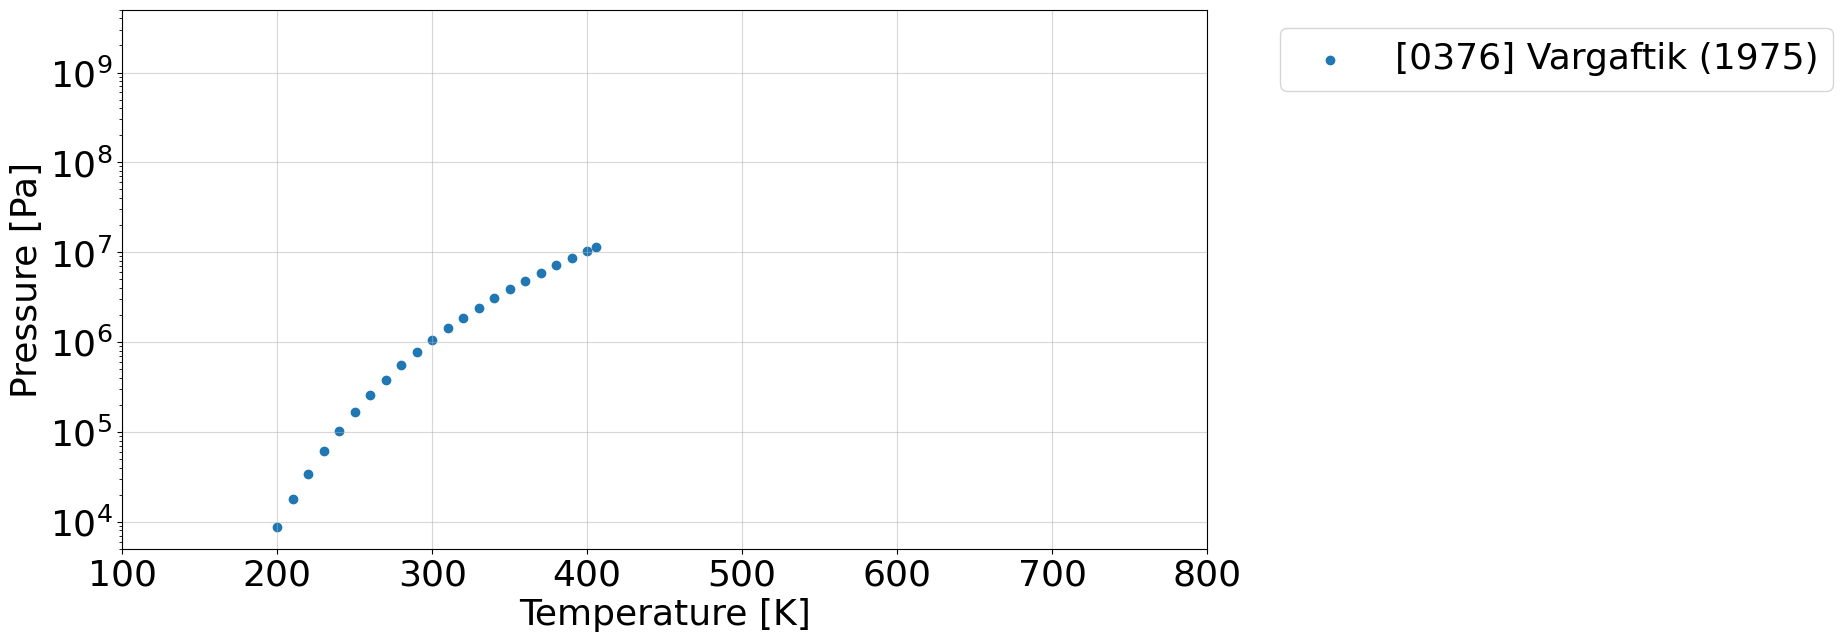

In [19]:
#05/11/2025
import pandas as pd
import matplotlib.pyplot as plt

def paper_path(paper_number):
    return f"dataframes/experimental_data_saturation/0{str(paper_number)}.xlsx"


#data: paper_number: [authors, year, path]
all_papers = {
    357: ["Beattie and Lawrence", 1930, paper_path(357)],
    358: ["Date", 1973, paper_path(358)],
    359: ["Date", 1973, paper_path(359)],
    # 360: ["Holcomb and Outcalt", 1999, paper_path(360)],
    # 361: ["Ichihara and Uematsu", 1994, paper_path(361)],
    # 362: ["Kasahara et al.", 1999, paper_path(362)],
    # 363: ["Keyes", 1931, paper_path(363)],
    # 364: ["Kondo et al.", 2002, paper_path(364)],
    # 365: ["Kumagai and Toriumi", 1971, paper_path(365)],
    # 367: ["Lichtblau et al.", 1964, paper_path(367)],
    # 368: ["Muromachi et al.", 2008, paper_path(368)],
    # 369: ["Perman and Davies", 1906, paper_path(369)],
    # 370: ["Sato et al.", 2005, paper_path(370)],
    # 372: ["Zander and Thomas", 1979, paper_path(372)],
    # 373: ["Harlow et al.", 1997, paper_path(373)],
    # 374: ["United States Bureau of Standards", 1923, paper_path(374)],
    376: ["Vargaftik", 1975, paper_path(376)],
}

# choose the paper
paper = 376

# the data
data = pd.read_excel(f"dataframes/experimental_data_saturation/0{str(paper)}.xlsx")

# data ranges
print(f"points = {data.index[-1]+1}")
print(f"pressure range = [{min(data['P_SI']/1e5):.2f}, {max(data['P_SI']/1e5):.2f}] bar")
print(f"temperature range = [{min(data['T_SI']):.2f}, {max(data['T_SI']):.2f}] K")


fig, ax = plt.subplots()


ax.scatter(data["T_SI"], data["P_SI"], label =  f"[0{paper}] " + all_papers[paper][0] + " " + f"({all_papers[paper][1]})")

ax.set(yscale="log", ylabel="Pressure [Pa]", xlabel="Temperature [K]", xlim=(100, 800), ylim=(5e3, 5e9))
ax.grid(alpha=0.5)
ax.legend(loc="upper left", bbox_to_anchor=(1.05,1))    
